In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pyhocon import ConfigFactory

In [2]:
from modularprophet.containers import Model, Sequential, Ensemble
from modularprophet.compositions import Additive, Stationary
from modularprophet.components import Trend, Regressor
from modularprophet.modules.ar_net import LaggedNet
from modularprophet.forecaster import ModularProphet

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/air_passengers.csv")

In [4]:
config = ConfigFactory.parse_string(json.dumps({
    "training": {
        "optimizer": "bfgs", 
        "learning_rate": 0.1,
        "epochs": 15,
        "batch_size": 256,
        "optimization_metric": "loss"
    },
    "model": {
        "args": {
            "n_forecasts": 1,
            "n_lags": 1
        }
    }
}))

In [5]:
m = ModularProphet(Additive(Trend(), LaggedNet(n_lags=1)))
m

Model(
	Additive(
		(trend): Trend('time',)
		(laggednet): LaggedNet(1, 0, 0, 'lags')
	)
)

In [6]:
m.fit(df, config, n_forecasts=1)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/karl/git/idic/venv/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name  | Type     | Params
-----------------------------------
0 | model | Additive | 3     
-----------------------------------
3         Trainable params
0         Non-trainable params
3         Total params
0.000     Total estimated model params size (MB)
/Users/karl/git/idic/venv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoade

""


In [7]:
list(m.model.parameters())

[Parameter containing:
 tensor([[-34.7740]], requires_grad=True),
 Parameter containing:
 tensor([[-12.8018]], requires_grad=True),
 Parameter containing:
 tensor([[13.8930]], requires_grad=True)]

In [8]:
prediction = m.predict(df)

/Users/karl/git/idic/venv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


<Axes: xlabel='x'>

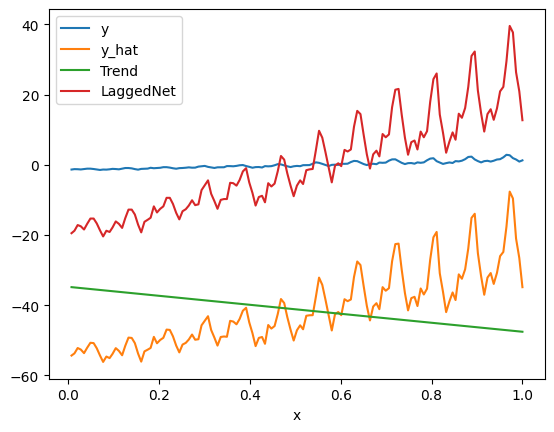

In [9]:
prediction.plot(x="x", y=[c for c in prediction.columns if c != "x"])